# Лабораторная работа №3. Синтез БИХ-фильтров.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ
# Модуль 3. Метод инвариантной импульсной характеристики.

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [193]:
%matplotlib inline
# %matplotlib notebook

Метод инвариантной импульсной характеристики относится к методам синтеза БИХ-фильтров на основе аналогового фильтра-прототипа. 

Он заключается в том, что импульсная характеристика аналогового фильтра ${{h}_{a}}(t)$ (реакция на дельта-функцию) дискретизуется с шагом $\Delta t$, в результате чего получается импульсная характеристика цифрового фильтра: $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ 
 
Пусть $H(f)$ – частотная характеристика цифрового фильтра, ${{H}_{a}}(f)$– аналогового. Тогда в силу $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ справедливо соотношение
$$H(f)=\sum\limits_{m=-\infty }^{\infty }{\ {{H}_{a}}}(f+m{{f}_{\text{д}}}).$$
При этом появляется эффект наложения (элайзинг/алиасинг).


## Пример. Синтез на основе интегрирующей RC-цепи

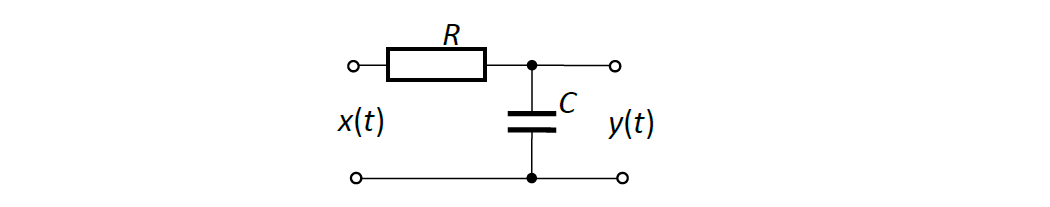

Ток, текущий через резистор, выражается через изменение напряжения на конденсаторе как 
$$i\left( t \right)\text{=}C\frac{dy(t)}{dt}.$$ 
Из закона Ома $$i(t)R\text{+ }y\left( t \right)=x\left( t \right).$$
$$RC\frac{dy(t)}{dt}\text{+ }y\left( t \right)=x\left( t \right).$$
Пусть $x(t)\overset{L}{\longleftrightarrow}X(p)$, $y(t)\overset{L}{\longleftrightarrow}Y(p)$. Тогда по свойствам преобразования Лапласа
$$\frac{dy(t)}{dt}\overset{L}{\longleftrightarrow}pY(p)-y(0)$$
Пусть в начальный момент времени $y(0)=0$. 
$$RCpY(p)+Y(p)=X(p).$$


Тогда передаточная функция аналогового фильтра имеет вид

$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

In [194]:
RC=2*1e-4 # постоянная времени RC цепи

In [195]:
lti_RC=signal.lti([1], [RC, 1])
lti_RC

TransferFunctionContinuous(
array([5000.]),
array([1.e+00, 5.e+03]),
dt: None
)

In [196]:
signal.ZerosPolesGain(lti_RC)

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-5000.]),
5000.0,
dt: None
)

Для аналогового фильтра импульсная характеристика может быть найдена с помощью обратного преобразования Лапласа для передаточной функции ${{H}_{a}}(p)$: 
$${{h}_{a}}(t)=\frac{1}{j2\pi }\oint\limits_{C}{{{H}_{a}}(p){{e}^{pt}}dp}=\underset{-1/RC}{\mathop{\text{Res}}}\,\frac{{{e}^{pt}}}{RC\left( p+\frac{1}{RC} \right)}=\frac{1}{RC}\exp \left( -\frac{t}{RC} \right),\,t\ge 0.$$


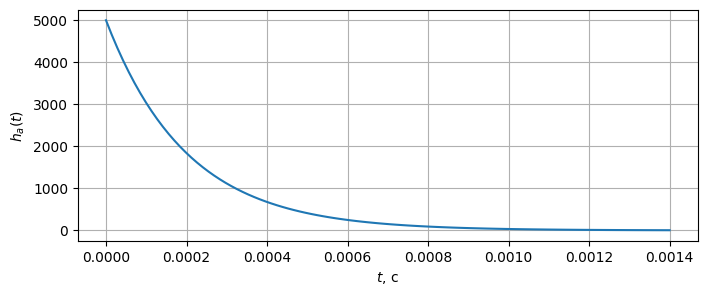

In [197]:
t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, h_a)
plt.xlabel("$t$, c")
plt.ylabel("$h_a(t)$")
plt.grid()

Частота среза RC-цепочки интегрирующего типа $f_c=\dfrac{1}{2\pi RC}$

In [198]:
1/(2*np.pi*RC) # Численное значение в Гц

795.7747154594767

In [199]:
w, H_a=signal.freqresp(lti_RC, w=np.linspace(-2*np.pi*3/(2*np.pi*RC), 2*np.pi*3/(2*np.pi*RC), 1024))

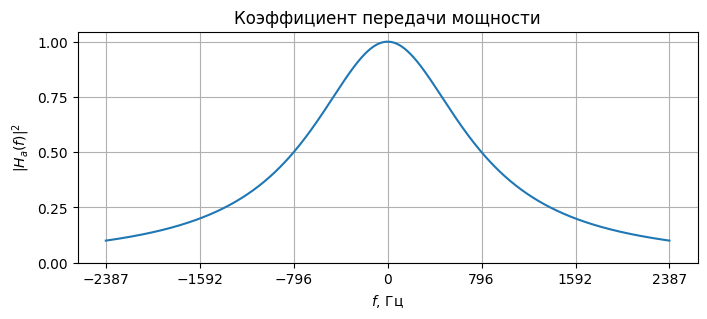

In [200]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a)**2)
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|^2$")
plt.title("Коэффициент передачи мощности")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(0, 1, 5))
plt.grid()

$$\dfrac{1}{\sqrt2}\approx 0,707$$

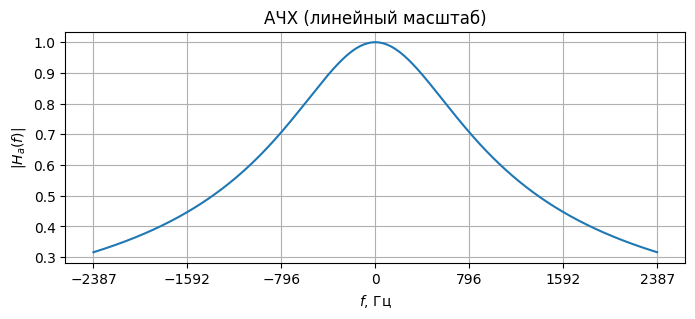

In [201]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a))
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.grid()

Для характеристик в дБ   

$20\log_{10}|H(f)|=10\log_{10}|H(f)|^2$

In [202]:
10*np.log10(0.5)

-3.010299956639812

In [203]:
20*np.log10(1/np.sqrt(2))

-3.0102999566398125

$10\log_{10}0.5\approx 20\log_{10} 0,707 \approx -3$ (дБ)

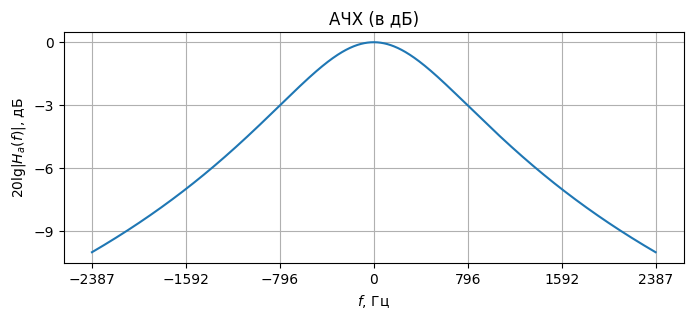

In [204]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), 20*np.log10(abs(H_a)))
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (в дБ)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(-9, 0, 4))
plt.grid()

$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

Дискретизуем импульсную характеристику 
$${{h}_{a}}(t)=\frac{1}{RC}\exp \left( -\frac{t}{RC} \right),\,t\ge 0.$$
с шагом $\Delta t$ так, что
$$h[k]=\Delta t\,{{h}_{a}}(k\Delta t).$$

$$h[k]=\frac{\Delta t}{RC}\exp \left( -\frac{k\Delta t}{RC} \right),\text{ }k\ge 0.$$

$\text{ }\!\!~\!\!\text{ }H(z)\text{ }\!\!~\!\!\text{ }=\text{ }\!\!~\!\!\text{ }\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}h[k]\text{ }\!\!~\!\!\text{ }{{z}^{-k}}=\dfrac{\Delta t}{RC}\text{ }\!\!~\!\!\text{ }\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}\exp \left( -\dfrac{k\Delta t}{RC} \right){{z}^{-k}}=\dfrac{\Delta t}{RC}\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}{{\left( \exp \left( -\dfrac{\Delta t}{RC} \right){{z}^{-1}} \right)}^{k}}=\dfrac{\dfrac{\Delta t}{RC}}{1-\exp \left( -\dfrac{\Delta t}{RC} \right){{z}^{-1}}}$

$$y[k]=\frac{\Delta t}{RC}x[k]+\exp \left( -\frac{\Delta t}{RC} \right)y[k-1]$$

In [205]:
dt=RC/8
dt

2.5e-05

In [206]:
beta=[dt/RC, 0]
alpha=[1, -np.exp(-dt/RC)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.125, 0.   ]),
array([ 1.       , -0.8824969]),
dt: 2.5e-05
)

In [207]:
signal.ZerosPolesGain(dlti_RC)

ZerosPolesGainDiscrete(
array([0.]),
array([0.8824969]),
0.125,
dt: 2.5e-05
)

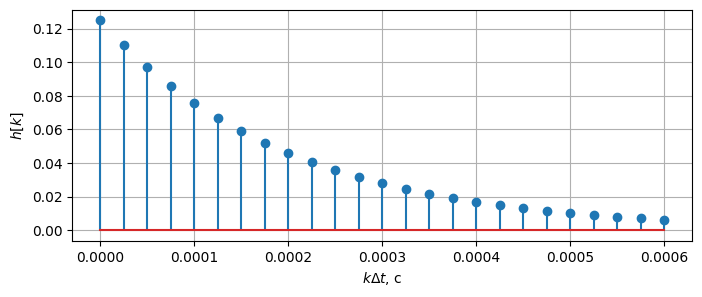

In [208]:
plt.figure(figsize=[8, 3], dpi=100)
t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h))
plt.xlabel("$k\Delta t$, c")
plt.ylabel("$h[k]$")
plt.grid()

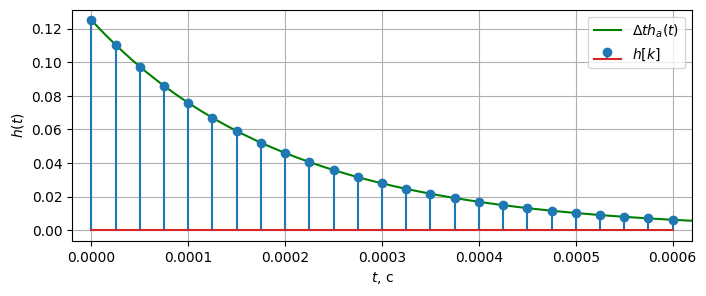

In [209]:
plt.figure(figsize=[8, 3], dpi=100)
t, h_a = signal.impulse(lti_RC)
plt.plot(t, dt*h_a, 'g', label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h), label="$h[k]$")

plt.legend()
plt.xlim([-0.00002, 0.00062])
plt.xlabel("$t$, c")
plt.ylabel("$h(t)$")
plt.grid()

In [210]:
1/(2*dt)

20000.0

In [211]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)

In [212]:
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

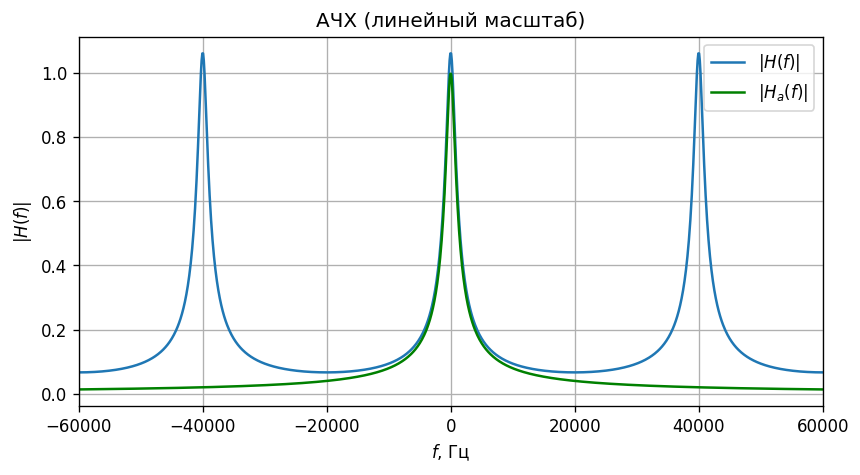

In [213]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

АЧХ цифрового фильтра и аналогового на интервале $[-f_д /2; f_д /2]$ незначительно отличаются и это отличие вызвано эффектом наложения отдельных копий АЧХ аналогового сигнала, сдвинутых на $f_д$.

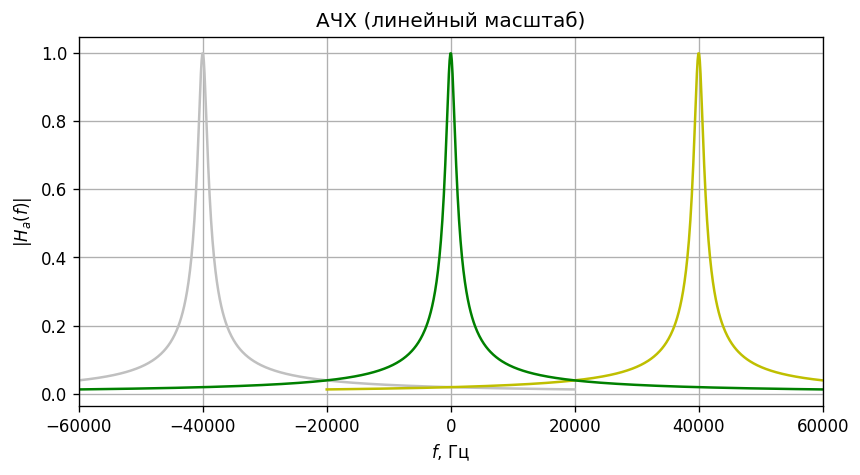

In [214]:
plt.figure(figsize=[8, 4], dpi=120)
#plt.plot(theta_d/(2*np.pi*dt), abs(H_d))
plt.plot(w_a/(2*np.pi)-(1/dt), abs(H_a), "silver")
plt.plot(w_a/(2*np.pi)+(1/dt), abs(H_a), "y")
plt.plot(w_a/(2*np.pi), abs(H_a), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.grid()

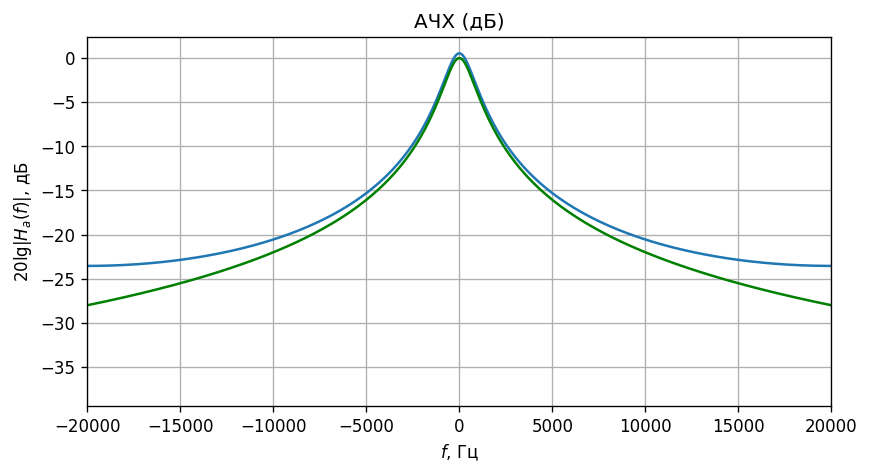

In [215]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)))
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.grid()

$$2\pi f_0 = \omega_0 (рад/с)$$

$$2\pi f_0 / f_Д= \theta_0 (рад)$$

$$2\pi \nu_0 =  \theta_0 (рад)$$

$$\nu_0 =  f_0 / f_Д$$

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

**Начало решения.** 

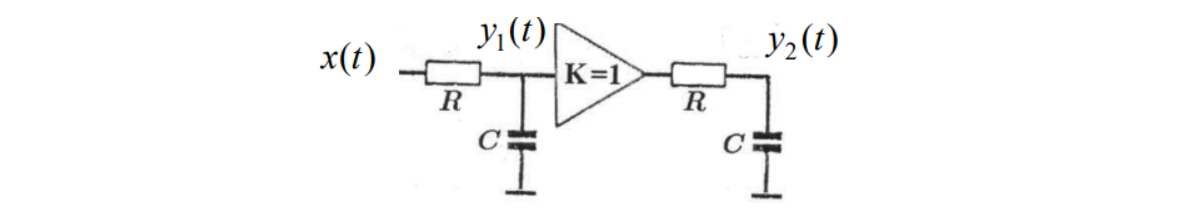
На рисунке между двумя  RC-цепочками  имеется  развязывающий повторитель, у которого большое входное и малое выходное сопротивление.  Это необходимо для устранения влияния цепочек друг на друга.

* Уравнение для одного RC-каскада:
$$RC\frac{dy}{dt}+{{y}_{1}}(t)=x(t)$$
Пусть ${{y}_{1}}(0)=0$. 

* Тогда преобразование Лапласа для него
$$RCp{{Y}_{1}}(p)+{{Y}_{1}}(p)=X(p)$$
* Передаточная функция
$${{H}_{1}}(p)=\frac{{{Y}_{1}}(p)}{X(p)}=\frac{1}{1+RCp}.$$

* Для двух последовательно соединенных RC-фильтров первого порядка
$${{H}_{2}}(p)={{H}_{1}}(p){{H}_{1}}(p)=\frac{1}{{{(RC)}^{2}}{{p}^{2}}+2RCp+1}.$$

Для аналогового фильтра импульсная характеристика может быть найдена с помощью обратного преобразования Лапласа для передаточной функции ${{H}_{a}}(p)$: 
$${{h}_{a}}(t)=\frac{1}{j2\pi }\oint\limits_{C}{{{H}_{a}}(p){{e}^{pt}}dp}, \qquad t\ge 0,$$
где контур $C$ охватывает все полюса подынтегральной функции. Для вычета в полюсе $m$-ого порядка воспользоваться формулой

$$\underset{{{z}_{p}}}{\mathop{\text{Res}}}\,\text{ }Y(z)=\frac{1}{(m-1)!}\text{ }\underset{z\to {{z}_{p}}}{\mathop{\lim }}\,\text{ }\frac{{{d}^{m-1}}}{d{{z}^{m-1}}}\left[ Y(z){{(z-{{z}_{p}})}^{m}} \right].$$

Дискретизовать импульсную характеристику по правилу  $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ и с помощью $z$-преобразования найти передаточную функцию цифрового фильтра $H(z)$.

In [216]:
# Python класс для анализа фильтра
class Filter:
    def __init__(self, dlti_args, fs=1.0):
        #         Инициализация на основе объекта signal.dlti
        self.fs = fs
        self.system_dlti = signal.dlti(*dlti_args, dt=1.0 / fs)
        self.alpha_beta()
        self.zpk()

    def alpha_beta(self):
        #         Вычисление коэффициентов alpha beta
        system = signal.TransferFunction(self.system_dlti)
        self.beta = system.num
        self.alpha = system.den

    def zpk(self):
        #         Вычисление нулей, полюсов и множителя
        system = self.system_dlti.to_zpk()
        self.zeros = system.zeros
        self.poles = system.poles
        self.gain = system.gain

    def zpk_plot(self):
        #         Нуль-полюсная диаграмма
        plt.figure()
        q = np.linspace(0, 2 * np.pi, 401)
        ax = plt.axes()
        ax.set_aspect(aspect="equal", adjustable="datalim")
        plt.plot(np.cos(q), np.sin(q), "k--")
        plt.plot(self.zeros.real, self.zeros.imag, "ro", label="Нули")
        plt.plot(self.poles.real, self.poles.imag, "bx", label="Полюса")
        plt.grid()
        plt.legend()  # bbox_to_anchor=(1.05, 1), loc=2, numpoints=1
        plt.title("Нуль-полюсная диаграмма")
        plt.xlabel("Re $z$")
        plt.ylabel("Im $z$")
        plt.tight_layout()
        plt.show()

    def H(self, z):
        #         Вычисление функции H(z) для заданного z. Требует предварительного вычисления нулей и полюсов.
        H = self.gain + 0
        for z1 in self.zeros:
            H *= z - z1
        for p1 in self.poles:
            H /= z - p1
        return H

    def abs_H_plot(self):
        #         Трехмерный график |H(z)|
        fig = plt.figure(dpi=160)
        ax = plt.axes(projection="3d")
        Re = np.arange(-1.2, 1.2, 0.1)
        Im = np.arange(-1.2, 1.2, 0.1)
        Re, Im = np.meshgrid(Re, Im)
        Z1 = Re + 1j * Im

        Z = abs(self.H(Z1))
        Z = np.minimum(Z, 40 * np.ones(Z.shape))

        phi = np.linspace(0, 2 * np.pi, 500)
        # ax.plot_surface(Re, Im, Z, linewidth=0, antialiased=True, color='silver')
        ax.plot_wireframe(Re, Im, Z, color="silver")

        for u in phi:
            Z1 = np.exp(-1j * u)
            Z2 = abs(self.H(Z1))
            ax.plot(
                [Z1.real, Z1.real],
                [Z1.imag, Z1.imag],
                [0.0, Z2],
                color=(abs(np.cos(u)), 0.7, 0.5),
            )

        Z1 = np.exp(-1j * phi)
        Z2 = abs(self.H(Z1))

        ax.plot(Z1.real, Z1.imag, Z2, linewidth=2, color="b")

        ax.set_zlim(0, 1.2 * max(Z2))
        ax.set_xticks(np.linspace(-1, 1, 5))
        ax.set_yticks(np.linspace(-1, 1, 5))
        ax.set_zticks(np.linspace(0, max(Z2), 5))
        ax.view_init(40, 240)
        ax.set_xlabel("Re $z$")
        ax.set_ylabel("Im $z$")

        ax.zaxis.set_rotate_label(False)  # disable automatic rotation
        ax.set_zlabel("$|H(z)|$", rotation=0)
        plt.tight_layout()

    def lfilter_resp(self, x):
        #         Фильтрация заданного сигнала
        return signal.lfilter(self.beta, self.alpha, x)

    def lfilt_plot(self, x, label="y"):
        self.alpha_beta()
        #         График сигнала на выходе фильтра при заданном входе
        y = self.lfilter_resp(x)
        plt.figure(figsize=[8, 3])
        plt.title("Сигнал на выходе фильтра")
        plt.stem(np.arange(y.shape[0]), y)
        plt.xlabel("$k$")
        plt.ylabel("$%s[k]$" % label)
        plt.tight_layout()
        plt.grid()

    def step_resp_plot(self, n=20):
        t, y = signal.dstep(self.system_dlti, n=n)
        plt.figure(figsize=[8, 3])
        plt.title("Переходная характеристика")
        y = np.squeeze(y)
        plt.stem(np.arange(len(y)), y)
        plt.xlabel("$k$")
        plt.ylabel("$g[k]$")
        plt.tight_layout()
        plt.grid()

    def impulse_resp_plot(self, n=20):
        t, y = signal.dimpulse(self.system_dlti, n=n)
        plt.figure(figsize=[8, 3])
        plt.title("Импульсная характеристика")
        y = np.squeeze(y)
        plt.stem(np.arange(len(y)), y)
        plt.xlabel("$k$")
        plt.ylabel("$h[k]$")
        plt.tight_layout()
        plt.grid()

    def freqresp_plot(self, f_scale="f", whole=True):
        #         АЧХ фильтра
        w, H = self.system_dlti.freqresp(w=None, n=2**18, whole=whole)
        if whole:
            w, H = w - np.pi, np.fft.fftshift(H)
        figure1 = plt.figure(figsize=[8, 6])
        ax1 = plt.subplot(2, 1, 1)
        ax2 = plt.subplot(2, 1, 2)

        for ax in [ax1, ax2]:
            if f_scale == "f":
                f = self.fs * (w / (2 * np.pi)) / 1e3
                ax.set_xlabel("$f$, кГц")
            elif f_scale == "\\nu":
                f = w / (2 * np.pi)
                ax.set_xlabel("$%s$" % f_scale)
            elif f_scale == "\\theta":
                f = w
                ax.set_xlabel("$%s$, рад" % f_scale)
            ax.set_xlim([f[0], f[-1]])
            ax.grid()

        ax1.set_title("AЧХ фильтра")
        ax1.plot(f, abs(H))
        ax1.set_ylabel("$|H(%s)|$" % f_scale)

        ax2.plot(f, np.angle(H))
        ax2.set_ylabel("$\\varphi(%s)$" % f_scale)
        ax2.set_yticks(
            [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
            labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"),
        )
        plt.tight_layout()

C:\Users\derzh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


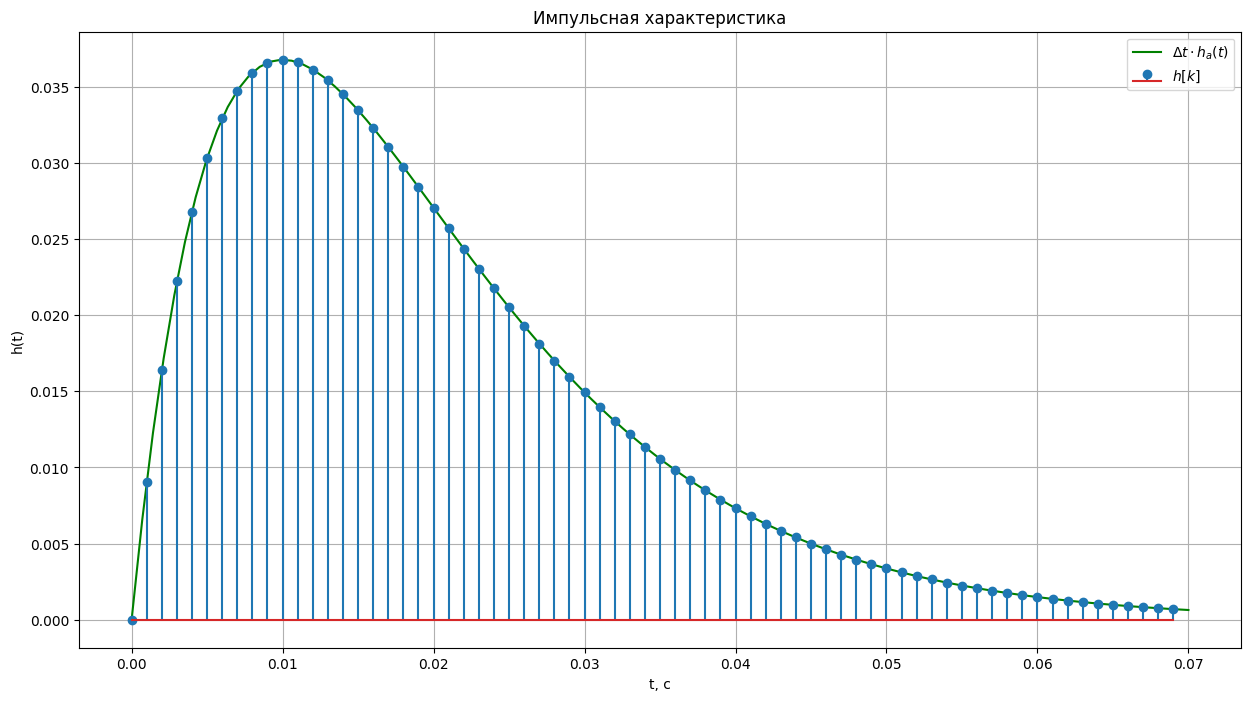

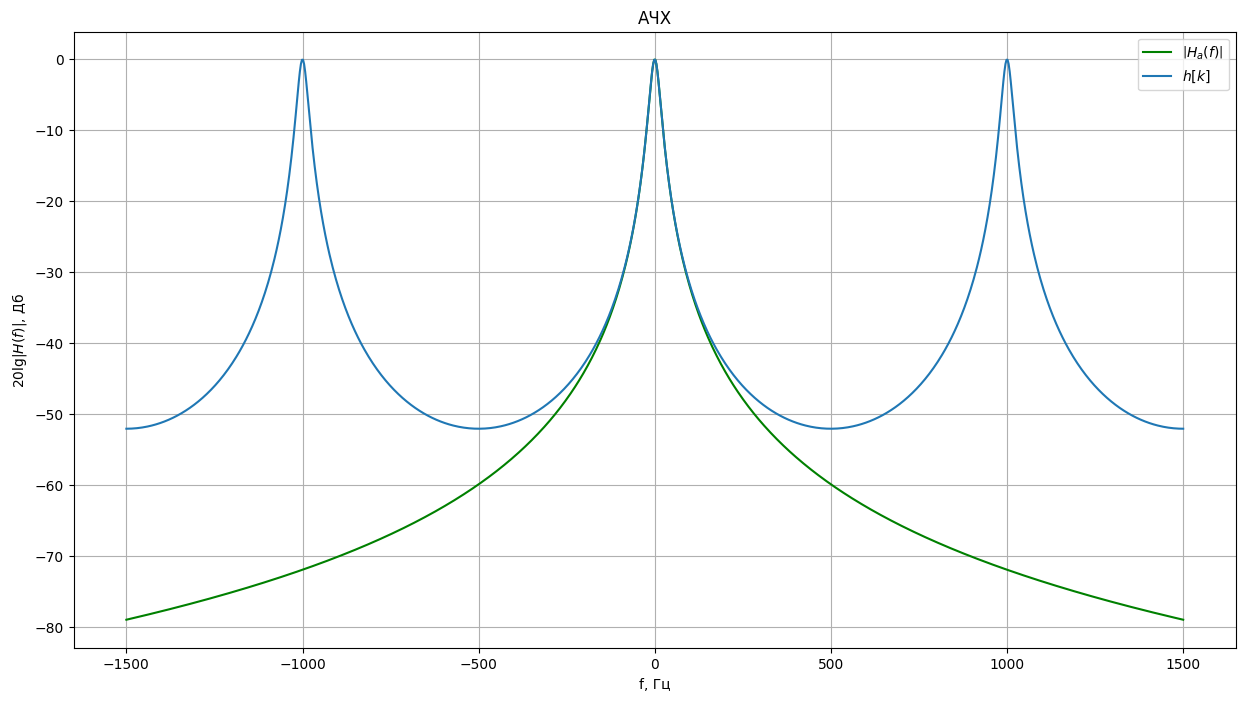

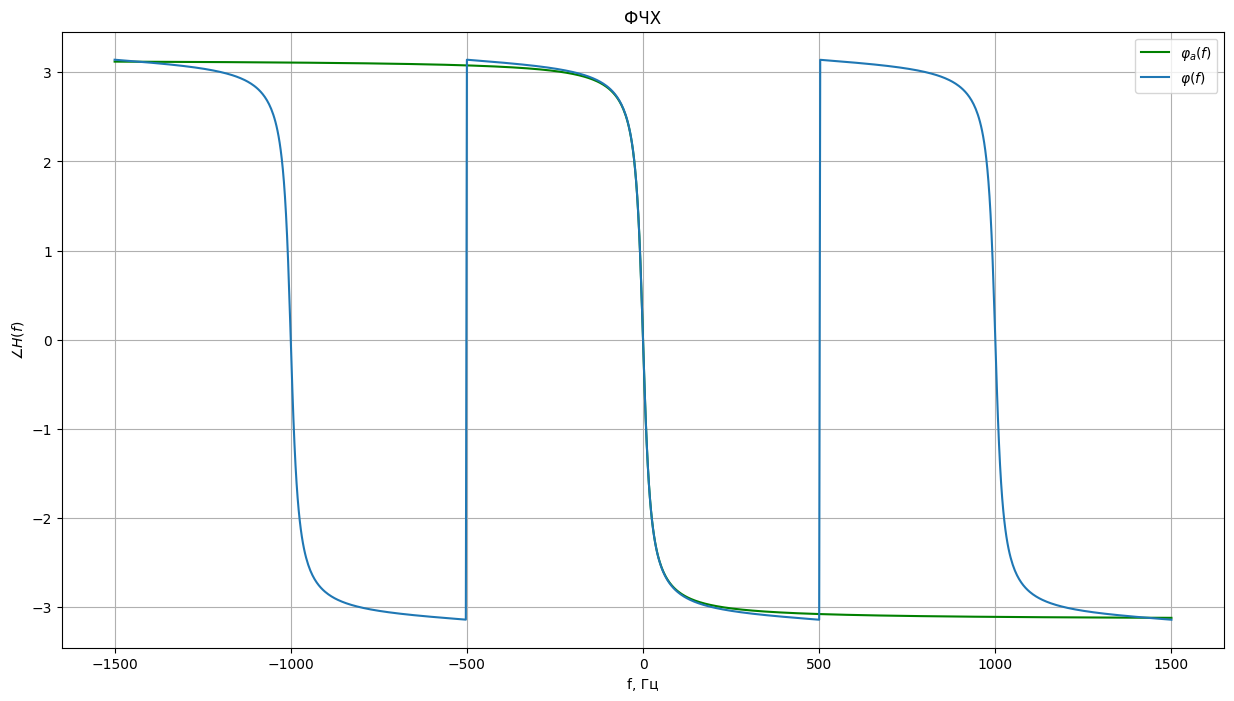

In [217]:
RC = 1e-2
fs = 10 / RC
dt = 1 / fs

lti = signal.lti([1], [RC**2, 2 * RC, 1])
dlti = Filter(
    (
        [0, (dt / RC) ** 2 * np.exp(-dt / RC), 0],
        [1, -2 * np.exp(-dt / RC), np.exp(-2 * dt / RC)],
    ),
    fs,
)

t, h = signal.impulse(lti)
tk, hd = signal.dimpulse(dlti.system_dlti, n=70)
plt.figure(figsize=[15, 8])
plt.plot(t, h * dt, "g", label="$\\Delta t \\cdot h_a(t)$")
plt.title("Импульсная характеристика")
plt.xlabel("t, с")
plt.ylabel("h(t)")
plt.stem(tk, np.squeeze(hd), label="$h[k]$")
plt.grid()
plt.legend()
plt.show()

wa, Ha = signal.freqresp(lti, w=np.linspace(-3 * np.pi, 3 * np.pi, 1000) / dt)
theta_d, Hd = signal.dfreqresp(
    dlti.system_dlti, w=np.linspace(-3 * np.pi, 3 * np.pi, 1000)
)
plt.figure(figsize=[15, 8])
plt.plot(
    wa / (2 * np.pi),
    20 * np.log10(abs(Ha)),
    "g",
    label="$\\left|H_a(f) \\right|$",
)
plt.title("АЧХ")
plt.xlabel("f, Гц")
plt.ylabel("$20 \lg |H(f)|$, Дб")
plt.plot(theta_d / (2 * np.pi * dt), 20 * np.log10(abs(Hd)), label="$h[k]$")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=[15, 8])
plt.plot(
    wa / (2 * np.pi),
    np.angle(Ha),
    "g",
    label="$\\varphi_a(f)$",
)
plt.title("ФЧХ")
plt.xlabel("f, Гц")
plt.ylabel("$\\angle H(f)$")
plt.plot(theta_d / (2 * np.pi * dt), np.angle(Hd), label="$\\varphi(f)$")
plt.grid()
plt.legend()

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.

In [223]:
import scipy.io.wavfile
from IPython.display import Audio

path = "../lab1/tuning-fork.wav"
Audio(path)

In [224]:
fs, x1 = scipy.io.wavfile.read(path)

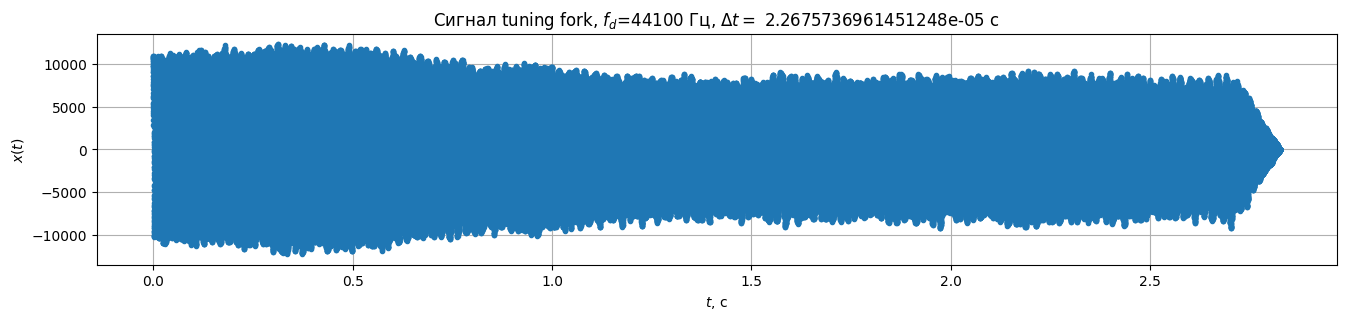

In [225]:
time_duration = 256000
time_delay = 11040
x = x1[time_delay : (time_delay + time_duration)]
plt.figure(figsize=[16, 3])
plt.plot(np.arange(x.size) / fs, x, ".")
plt.xlabel("$t$, c")
plt.ylabel("$x(t)$")
plt.title(f"Сигнал tuning fork, $f_d$={fs} Гц, $\Delta t=$ {1 / fs} c")
plt.grid()

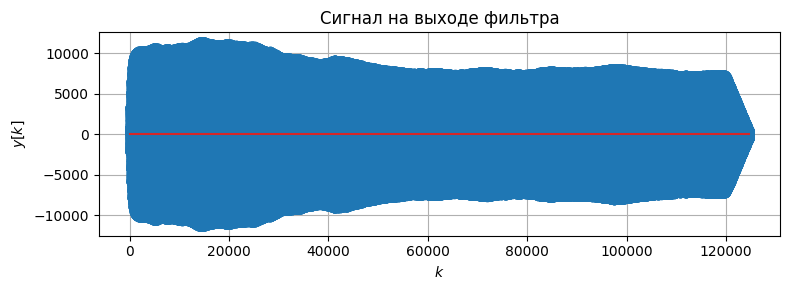

In [250]:
f_0 = 440 # Ля первой октавы
ffs = fs
flt = Filter((signal.iirpeak(f_0, Q=10, fs=fs)), fs)
y = flt.lfilter_resp(x)
flt.lfilt_plot(x)

In [251]:
res = np.array(y, dtype=np.int16)
res

array([  8,  28,  51, ...,  38,   9, -19], dtype=int16)

In [252]:
out_file = "tuning_fork_filtered.wav"
scipy.io.wavfile.write(filename=out_file, rate=fs, data=res)
Audio(out_file)